# Tomboy Customer Analysis
This analysis shows some of the high-level code along with the results. If you're uninterested in the code, 

In [22]:
import gender_guesser.detector as gender
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import sys
if '../catools' not in sys.path:
    sys.path.append('../catools')
from catools import *
import numpy as np

In [2]:
df = pd.read_csv("orders-2018-03-05-20-34-17.csv")
df = df.drop(['Order Status', 'Customer Note',
       'First Name (Billing)', 'Last Name (Billing)', 'Company (Billing)',
       'Address 1&2 (Billing)', 'City (Billing)', 'State Code (Billing)', 'Postcode (Billing)', 'Country Code (Billing)', 'Email (Billing)', 'Phone (Billing)', 'Coupon Code', 'Discount Amount', 'Discount Amount Tax', 'Shipping Method Title', 'Payment Method Title', 'Cart Discount Amount', 'Order Subtotal Amount', 'Order Shipping Amount', 'Order Refund Amount', 'Order Total Tax Amount',], axis=1)

In [3]:
df['Customer Hash'] = df['First Name (Shipping)'] + df['Last Name (Shipping)'] + df['Postcode (Shipping)']
df['Customer Hash'] = df['Customer Hash'].apply(hash)

19.87% of transactions involve repeat customers


/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


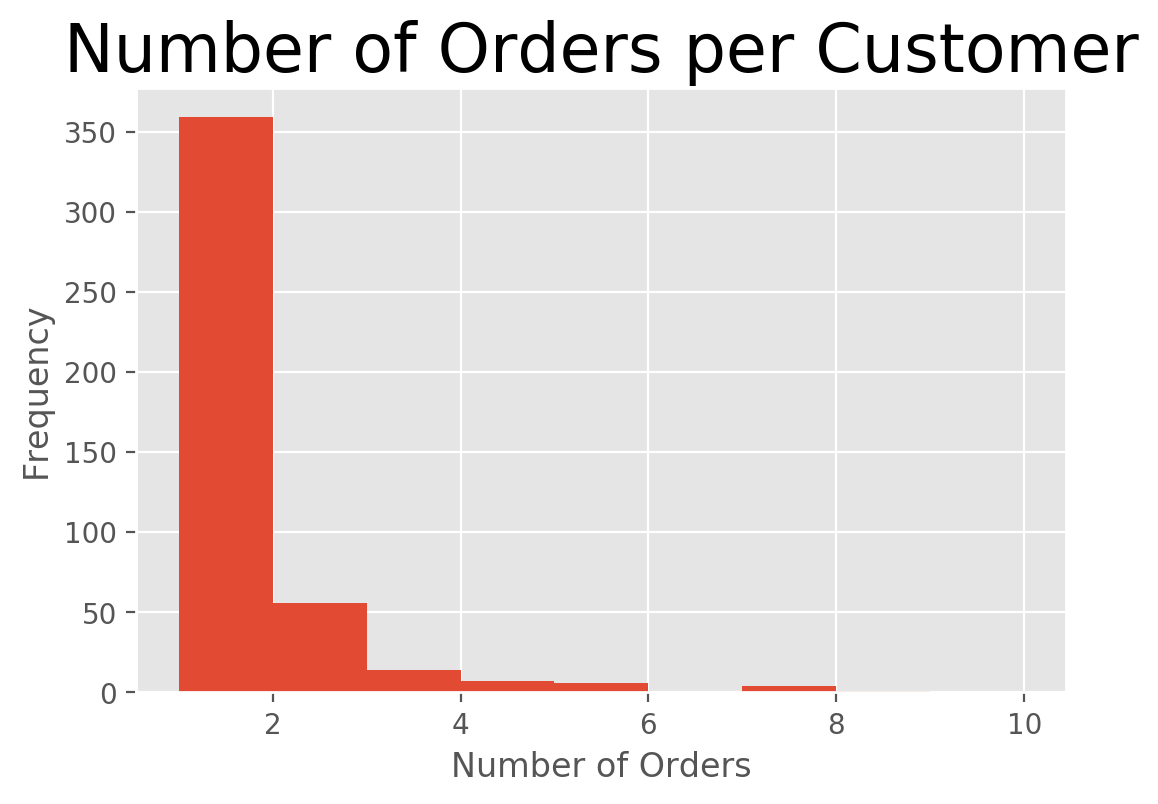

In [4]:
purchase_frequency(df.groupby('Order Number')['Customer Hash'].first())
plt.show()

## Gender Breakdown

Out of 1450 total customers:
	1097 (75.66%) cusomters were Female
	244 (16.83%) cusomters were Andro/Unknown
	109 (7.52%) cusomters were Male


/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


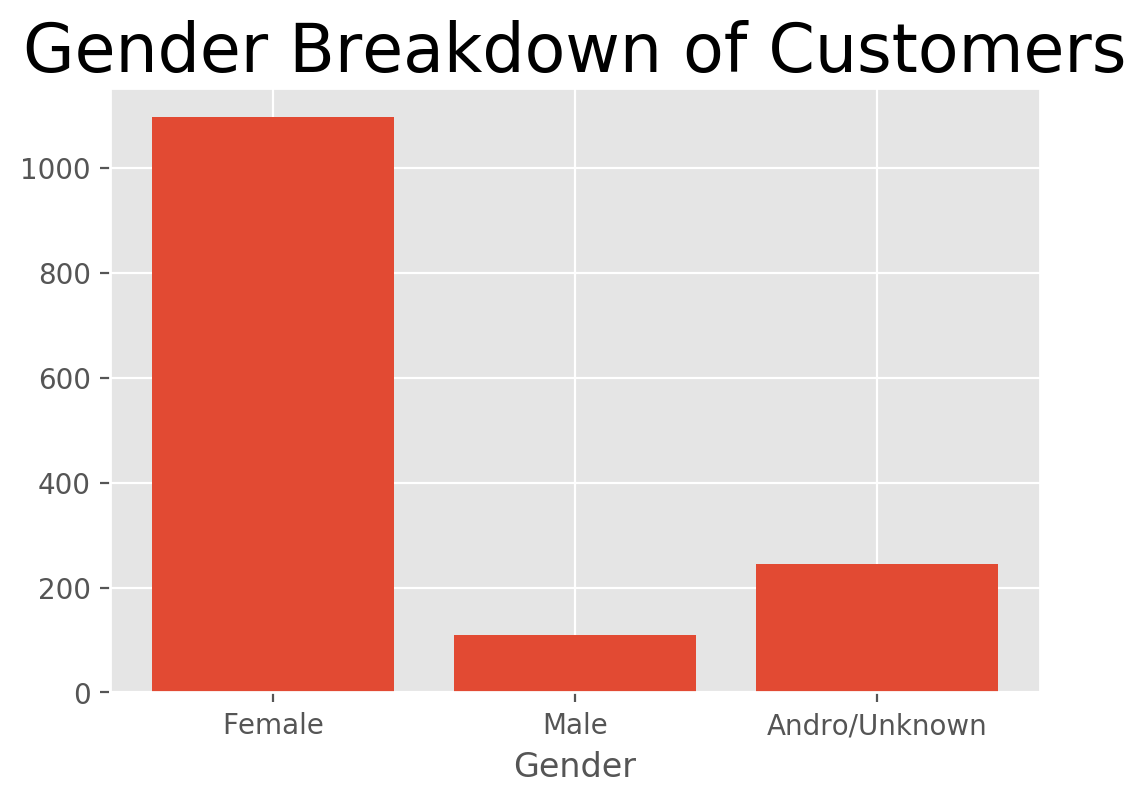

In [5]:
gender_breakdown(df['First Name (Shipping)'].values)
plt.show()

# Average Purchase

Your avaerage purchase is $49.195842696629214.


/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


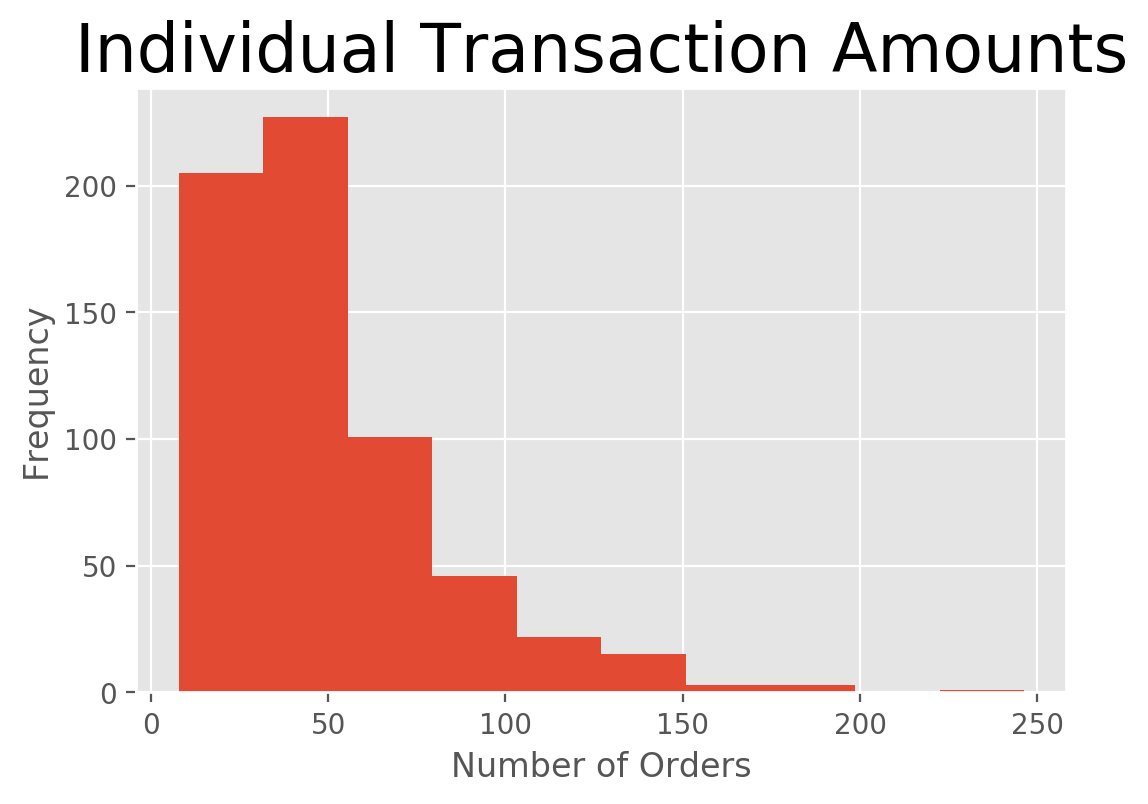

In [6]:
average_purchase(df.groupby('Order Number')['Order Total Amount'].first())
plt.show()

# Lifetime Value of Customer

Your avaerage customer is worth $68.41296875 over their lifetime.


/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


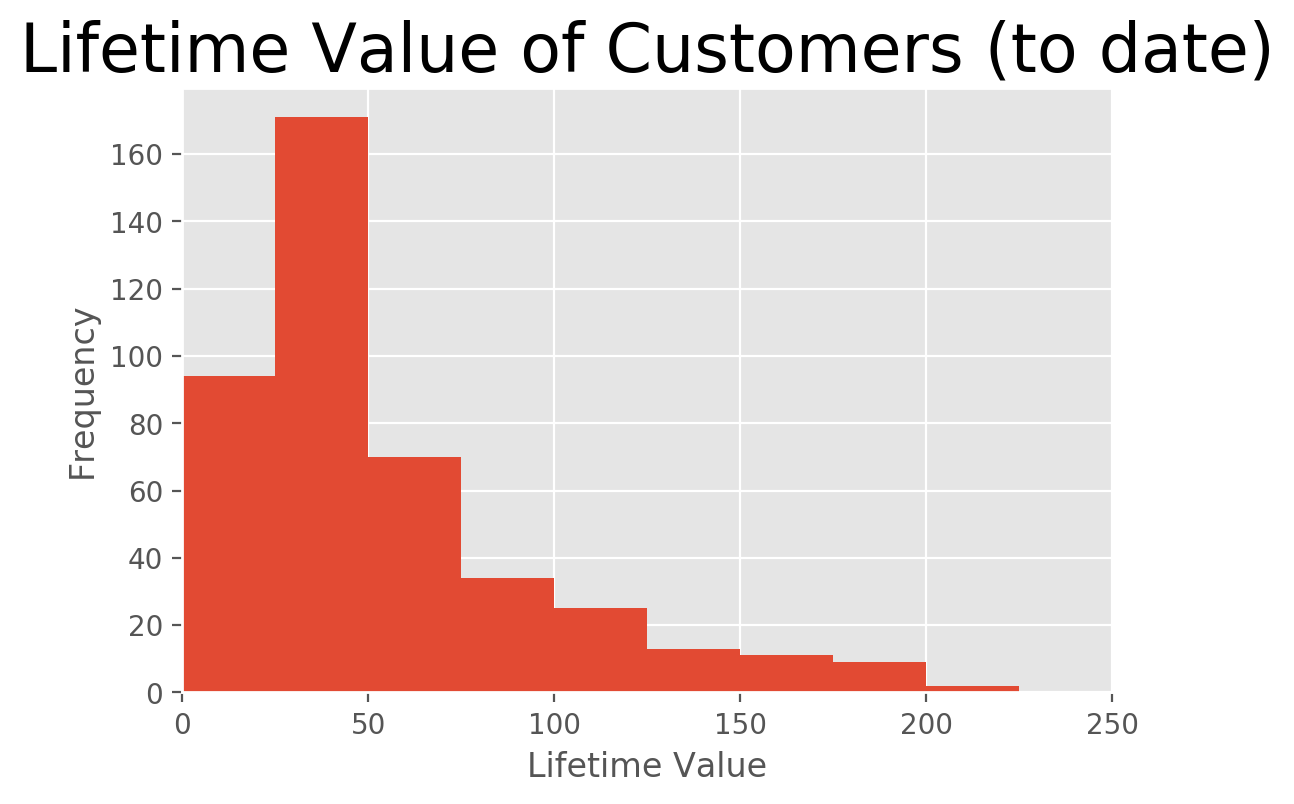

In [7]:
plot_options = {}
plot_options['bins'] = [i * 25 for i in range(10)]
lifetime_value(df.groupby('Order Number')['Customer Hash'].first(), df.groupby('Order Number')['Order Total Amount'].first(), plot_options=plot_options)
plt.xlim([0, 250])
plt.show()

In [18]:
print(df.columns)
# cp := customer profile
cp = pd.DataFrame({
    'Average Order (Intensity)': df.groupby('Customer Hash')['Order Total Amount'].mean(),
    'Order Number (Frequency)' : df.groupby('Customer Hash')['Order Number'].count(),
    'Name': df.groupby('Customer Hash')['First Name (Shipping)'].first()
})

ge = GenderEstimator()
cp['Gender'] = cp['Name'].apply(ge.estimate)
cp

Index(['Order Number', 'Order Date', 'First Name (Shipping)',
       'Last Name (Shipping)', 'Address 1&2 (Shipping)', 'City (Shipping)',
       'State Code (Shipping)', 'Postcode (Shipping)',
       'Country Code (Shipping)', 'Item #', 'SKU', 'Name', 'Quantity',
       'Item Cost', 'Order Total Amount', 'Customer Hash'],
      dtype='object')
unknown
unknown
unknown
andy
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
andy
unknown
andy
unknown
unknown
unknown
unknown
unknown
unknown
unknown
andy
unknown
andy
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown


,Average Order (Intensity),Name,Order Number (Frequency),Gender
Customer Hash,,,,
-9188401898551042117,57.750000,Mariesa,4,Andro/Unknown
-9095283975544147969,69.490000,Kim,4,Female
-9074834651607560149,21.690000,Carol Mayo,1,Female
-9065186229936471572,41.856667,Susan,9,Female
-8981795032464563189,43.800000,Angela,3,Female
-8905153350084992336,32.590000,Beverly,1,Female
-8808748015840226010,28.850000,Rob,2,Male
-8808225498950919886,21.690000,Wendy,1,Female
-8796782992954561443,47.800000,Susan,2,Female


In [45]:
def make_color(c):
    if c == 'Male':
        return (.3, .4, 1, 0.7)
    elif c == 'Female':
        return (1, 0.3, 0.3, 0.7)
    else:
        return (0.7, 0.7, 0.7, 0.7)

In [46]:
cp['Log AO'] = cp['Average Order (Intensity)'].apply(np.log)
cp['Log ON'] = cp['Order Number (Frequency)'].apply(np.log)
cp['Gender'].value_counts()

Female           320
Andro/Unknown     73
Male              55
Name: Gender, dtype: int64

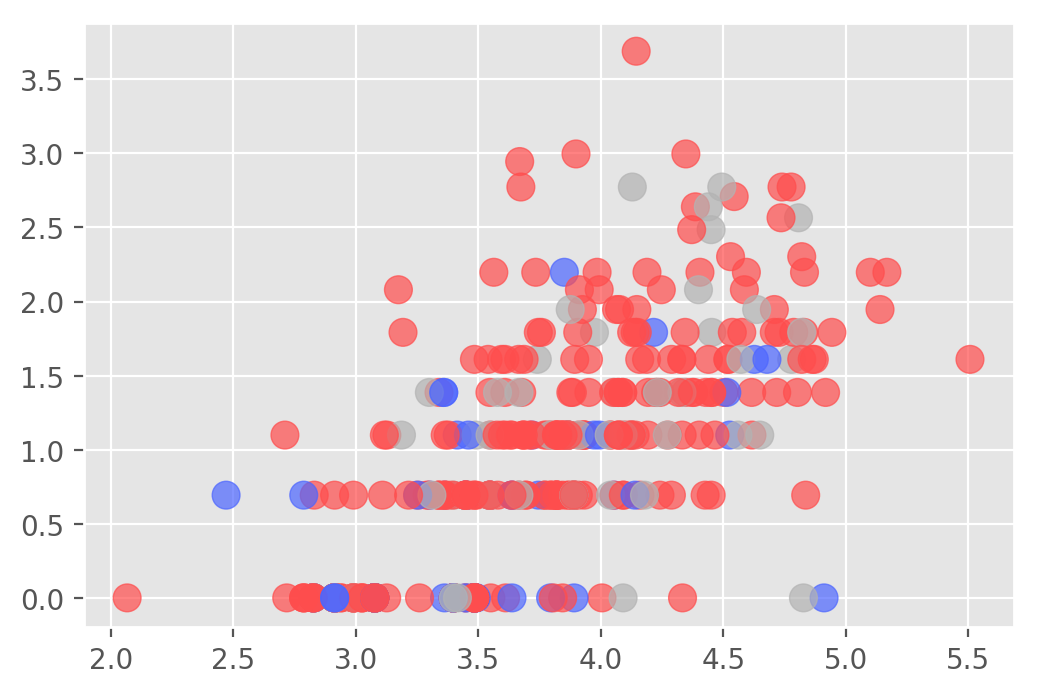

In [47]:
plt.style.use('ggplot')
plt.figure(dpi=200)
plt.scatter(cp['Log AO'], cp['Log ON'], c=[make_color(c) for c in cp['Gender'].values], s=100)
plt.ylabel("")
plt.show()